## Final Project Submission

* Student name: Matthew Lipman
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import haversine as hs #geographic distance calculator

## Load and observe data

In [2]:
df = pd.read_csv('data/all_features_ppsqft_quant.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17495 entries, 0 to 17494
Data columns (total 28 columns):
Unnamed: 0                          17495 non-null int64
price                               17495 non-null float64
sqft_living                         17495 non-null int64
lat                                 17495 non-null float64
long                                17495 non-null float64
price_per_sqft                      17495 non-null float64
min_dist_park                       17495 non-null float64
closest_distance_to_top_school      17495 non-null float64
closest_distance_to_great_coffee    17495 non-null float64
closest_distance_to_scientology     17495 non-null float64
interaction                         17495 non-null float64
quant_sqft_living                   17495 non-null float64
quant_coffee                        17495 non-null float64
quant_parks                         17495 non-null float64
quant_schools                       17495 non-null float64
quant_scie

### Look into the data and confirm normality for modeling

Price per square foot represents a normal distribution.
Skewness: 0.3602071215862736
Kurtosis: -0.7052077098771936
n= 17495


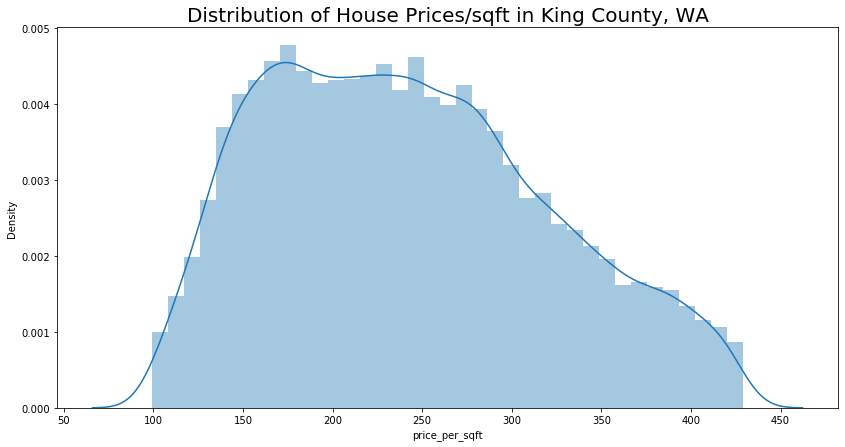

In [4]:
plt.figure(figsize=(14,7))
sns.distplot(df['price_per_sqft'])
plt.title("Distribution of House Prices/sqft in King County, WA", fontsize=20);
print("Price per square foot represents a normal distribution.")
print("Skewness:", df['price_per_sqft'].skew())
print("Kurtosis:", df['price_per_sqft'].kurt())
print("n=",len(df['price_per_sqft']))

> **Comment:** We had reduced all rows with prices per square foot outside 1.5x the standard deviations

Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.
Displays a positive skewness.
Skewness: 1.9376002140371387
Kurtosis: 11.440595305150612
n= 17495


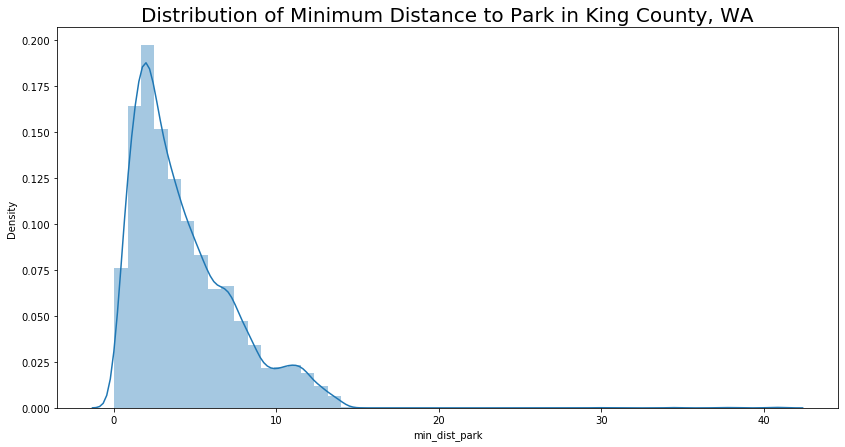

In [5]:
plt.figure(figsize=(14,7))
sns.distplot(df['min_dist_park'])
plt.title("Distribution of Minimum Distance to Park in King County, WA", fontsize=20);
print("Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.")
print("Displays a positive skewness.")
print("Skewness:", df['min_dist_park'].skew())
print("Kurtosis:", df['min_dist_park'].kurt())
print("n=",len(df['min_dist_park']))

> **Comment:** Will need to either remove outliers to reduce kurtosis or conduct a transformation of data to spread out the peak.

Distribution appears to be trimodal.
Skewness: 0.6667217435869717
Kurtosis: 0.7472865498443166
n= 17495


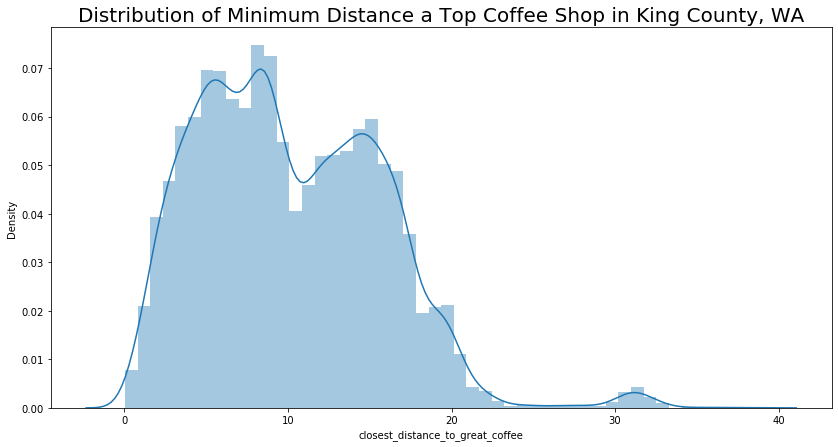

In [6]:
plt.figure(figsize=(14,7))
sns.distplot(df['closest_distance_to_great_coffee'])
plt.title("Distribution of Minimum Distance a Top Coffee Shop in King County, WA", fontsize=20);
print("Distribution appears to be trimodal.")
print("Skewness:", df['closest_distance_to_great_coffee'].skew())
print("Kurtosis:", df['closest_distance_to_great_coffee'].kurt())
print("n=",len(df['closest_distance_to_great_coffee']))

> **Comment:** Will need to conduct a transformation of some sort to convert to unimodal.

Distribution appears to be trimodal and contain high level of tails.
Skewness: 0.7838143243623013
Kurtosis: 0.19909190269874388
n= 17495


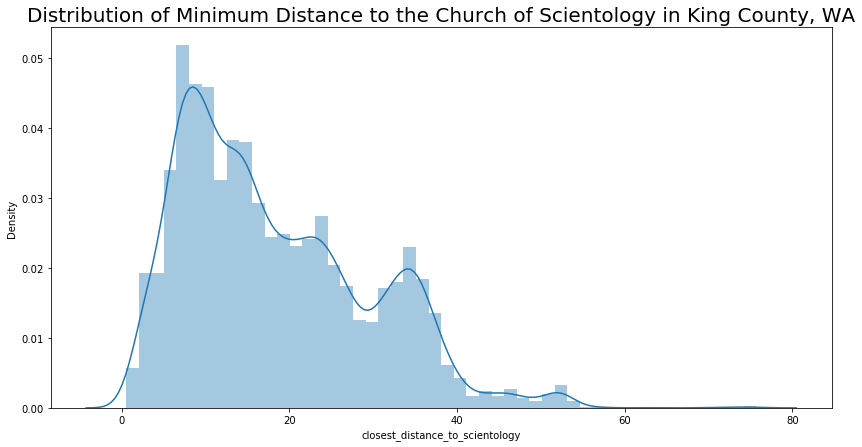

In [7]:
plt.figure(figsize=(14,7))
sns.distplot(df['closest_distance_to_scientology'])
plt.title("Distribution of Minimum Distance to the Church of Scientology in King County, WA", fontsize=20);
print("Distribution appears to be trimodal and contain high level of tails.")
print("Skewness:", df['closest_distance_to_scientology'].skew())
print("Kurtosis:", df['closest_distance_to_scientology'].kurt())
print("n=",len(df['closest_distance_to_scientology']))

> **Comment:** Will need to conduct a transformation of some sort to convert to unimodal. Additionally, could remove outliers to reduce the upper tails.

Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.
Skewness: 2.1535982084843326
Kurtosis: 5.230624673347833
n= 17495


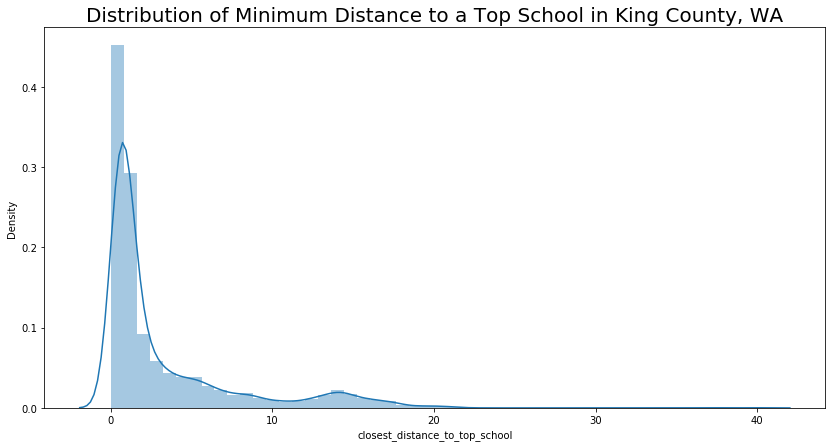

In [8]:
plt.figure(figsize=(14,7))
sns.distplot(df['closest_distance_to_top_school'])
plt.title("Distribution of Minimum Distance to a Top School in King County, WA", fontsize=20);
print("Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.")
print("Skewness:", df['closest_distance_to_top_school'].skew())
print("Kurtosis:", df['closest_distance_to_top_school'].kurt())
print("n=",len(df['closest_distance_to_top_school']))

> **Comment:** Will need to remove outliers to reduce kurtosis. Additionally, there appears to be a second peak in between 10km and 20km, which a transformation can hopefully address.

## Removing outliers to improve normality

In [9]:
#Creating function to remove outliers by column and number of standard deviations.
#def address_outliers(column, std):
#    df_no_outlier = df[(np.abs(stats.zscore(df[column])) < std)]
#    print("I have removed all outliers that are more than", std, "standard deviations outside of the mean. I have removed a total number of", len(df)-len(df_no_outlier), "rows.")
#    return df_no_outlier[column].describe()

In [10]:
#Remove outliers from 'min_dist_park'
df_train = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print("I have removed all outliers that are more than 3 standard deviations outside of the mean. I have removed a total number of", len(df)-len(df_train), "rows.")

I have removed all outliers that are more than 3 standard deviations outside of the mean. I have removed a total number of 3806 rows.


Price per square foot represents a normal distribution.
Skewness: 0.3467099553043447
Kurtosis: -0.7326018997900481
n= 13689


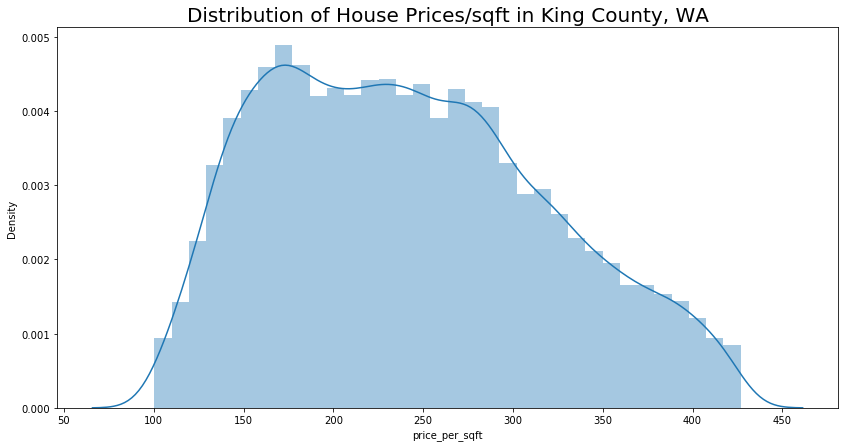

In [11]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['price_per_sqft'])
plt.title("Distribution of House Prices/sqft in King County, WA", fontsize=20);
print("Price per square foot represents a normal distribution.")
print("Skewness:", df_train['price_per_sqft'].skew())
print("Kurtosis:", df_train['price_per_sqft'].kurt())
print("n=",len(df_train['price_per_sqft']))

Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.
Displays a positive skewness.
Skewness: 1.0000436814151807
Kurtosis: 0.3499078138572256
n= 13689


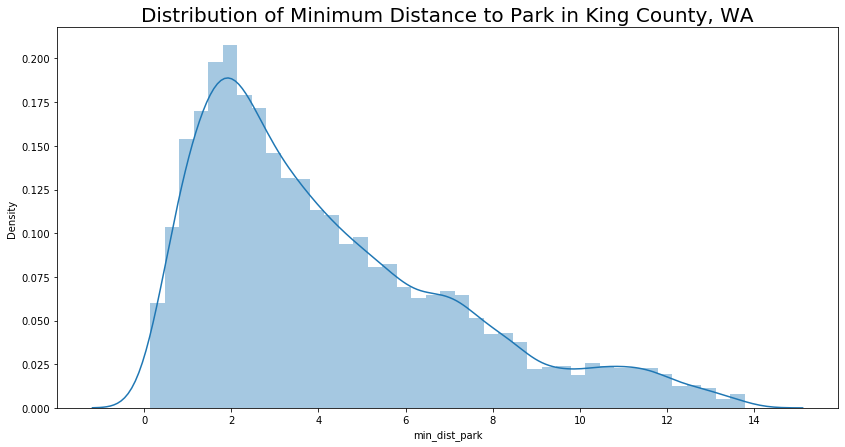

In [12]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['min_dist_park'])
plt.title("Distribution of Minimum Distance to Park in King County, WA", fontsize=20);
print("Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.")
print("Displays a positive skewness.")
print("Skewness:", df_train['min_dist_park'].skew())
print("Kurtosis:", df_train['min_dist_park'].kurt())
print("n=",len(df_train['min_dist_park']))

> **Comment:** After removing outliers, the kurtosis is greatly reduced. Unfortunately, the distribution still appears to display a positive skew. Conducting a log transformation may help.

Distribution appears to be trimodal.
Skewness: 0.1915013530897659
Kurtosis: -0.8719485370148279
n= 13689


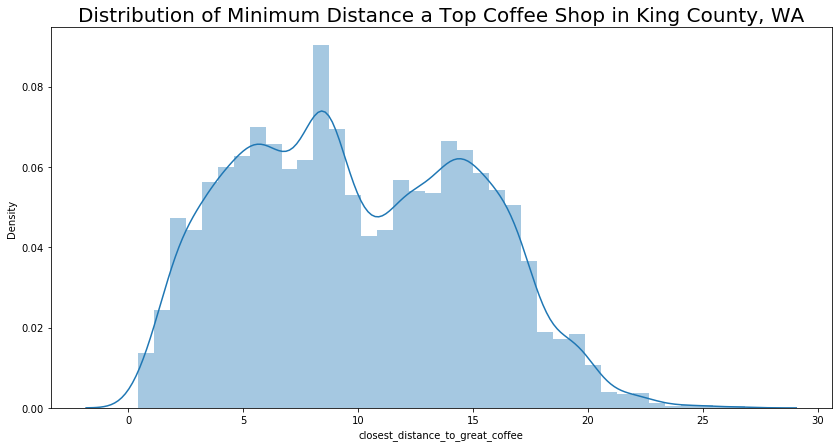

In [13]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['closest_distance_to_great_coffee'])
plt.title("Distribution of Minimum Distance a Top Coffee Shop in King County, WA", fontsize=20);
print("Distribution appears to be trimodal.")
print("Skewness:", df_train['closest_distance_to_great_coffee'].skew())
print("Kurtosis:", df_train['closest_distance_to_great_coffee'].kurt())
print("n=",len(df_train['closest_distance_to_great_coffee']))

> **Comment:** While both skew and kurtosis have reduced, we will still need to conduct a transformation of some sort to convert to unimodal. The distribution changed from trimodality to bimodality.

Distribution appears to be trimodal and contain high level of tails.
Skewness: 0.4910428972767539
Kurtosis: -0.8409064986415378
n= 13689


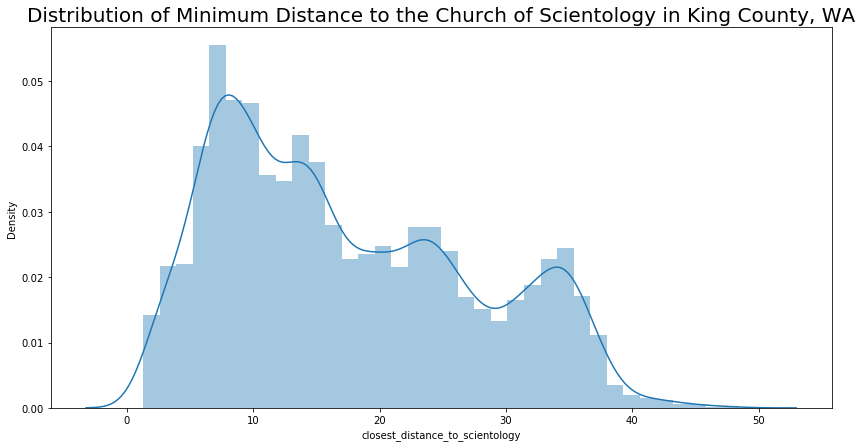

In [14]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['closest_distance_to_scientology'])
plt.title("Distribution of Minimum Distance to the Church of Scientology in King County, WA", fontsize=20);
print("Distribution appears to be trimodal and contain high level of tails.")
print("Skewness:", df_train['closest_distance_to_scientology'].skew())
print("Kurtosis:", df_train['closest_distance_to_scientology'].kurt())
print("n=",len(df_train['closest_distance_to_scientology']))

> **Comment:** Will still need to conduct a transformation of some sort to convert to unimodal. Despite substantially less skew, it is still polymodal.

Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.
Skewness: 1.8782523392341854
Kurtosis: 2.5897260959739903
n= 13689


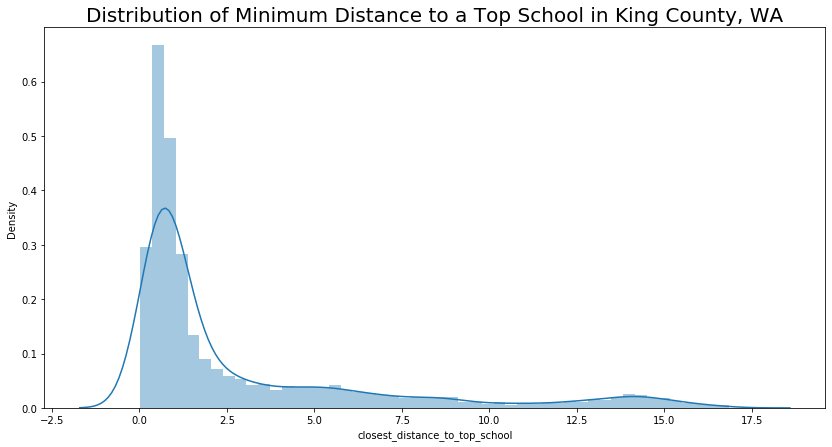

In [15]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['closest_distance_to_top_school'])
plt.title("Distribution of Minimum Distance to a Top School in King County, WA", fontsize=20);
print("Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.")
print("Skewness:", df_train['closest_distance_to_top_school'].skew())
print("Kurtosis:", df_train['closest_distance_to_top_school'].kurt())
print("n=",len(df_train['closest_distance_to_top_school']))

> **Comment:** Will still need to conduct a transformation because continues to display high skew and kurtosis.

In [16]:
print("In the process of removing outliers, we ended up removing,", round(100-((len(df_train)/len(df))*100),3), "% of the data using 1.5 standard deviations of price per square foot.")
print("We still have", len(df_train), "rows.")

In the process of removing outliers, we ended up removing, 21.755 % of the data using 1.5 standard deviations of price per square foot.
We still have 13689 rows.


## Grade as a categorical variable

### How many grades were removed as a result of removing outliers?

In [17]:
print("There are a total of", sum(df_train['grade_5']),"houses with a grade score of 5.")
print("There are a total of", sum(df_train['grade_6']),"houses with a grade score of 6.")
print("There are a total of", sum(df_train['grade_7']),"houses with a grade score of 7.")
print("There are a total of", sum(df_train['grade_8']),"houses with a grade score of 8.")
print("There are a total of", sum(df_train['grade_9']),"houses with a grade score of 9.")
print("There are a total of", sum(df_train['grade_10']),"houses with a grade score of 10.")
print("There are a total of", sum(df_train['grade_11']),"houses with a grade score of 11.")
print("There are a total of", sum(df_train['grade_12']),"houses with a grade score of 12.")
print("There are a total of", sum(df_train['grade_13']),"houses with a grade score of 13.")

There are a total of 0 houses with a grade score of 5.
There are a total of 0 houses with a grade score of 6.
There are a total of 7341 houses with a grade score of 7.
There are a total of 4579 houses with a grade score of 8.
There are a total of 1759 houses with a grade score of 9.
There are a total of 0 houses with a grade score of 10.
There are a total of 0 houses with a grade score of 11.
There are a total of 0 houses with a grade score of 12.
There are a total of 0 houses with a grade score of 13.


## Transforming the data

In [18]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
to_transform= ['closest_distance_to_great_coffee', 'min_dist_park', 'closest_distance_to_top_school', 'closest_distance_to_scientology']
df_train[to_transform] = qt.fit_transform(df_train[to_transform])

In [19]:
#to visualize the changes from this quantile transformation.
df_train.head()

,Unnamed: 0,price,sqft_living,lat,long,price_per_sqft,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,...,quant_interaction,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,221900.0,1180,47.5112,-122.257,188.050847,-0.594990,-1.643486,-0.995786,-0.248198,...,-1.113496,0,0,1,0,0,0,0,0,0
1,1,538000.0,2570,47.7210,-122.319,209.338521,0.616165,-0.501822,0.816275,-0.413054,...,-0.498561,0,0,1,0,0,0,0,0,0
3,3,604000.0,1960,47.5208,-122.393,308.163265,-0.379125,0.336802,0.747785,-0.349731,...,0.052283,0,0,1,0,0,0,0,0,0
4,4,510000.0,1680,47.6168,-122.045,303.571429,0.100048,0.096376,-0.159656,0.398895,...,0.156094,0,0,0,1,0,0,0,0,0
6,6,257500.0,1715,47.3097,-122.327,150.145773,0.244918,2.559186,1.252973,1.366169,...,1.816976,0,0,1,0,0,0,0,0,0


Skewness: -0.005675299826226683
Kurtosis: 0.07067097222146312
n= 13689


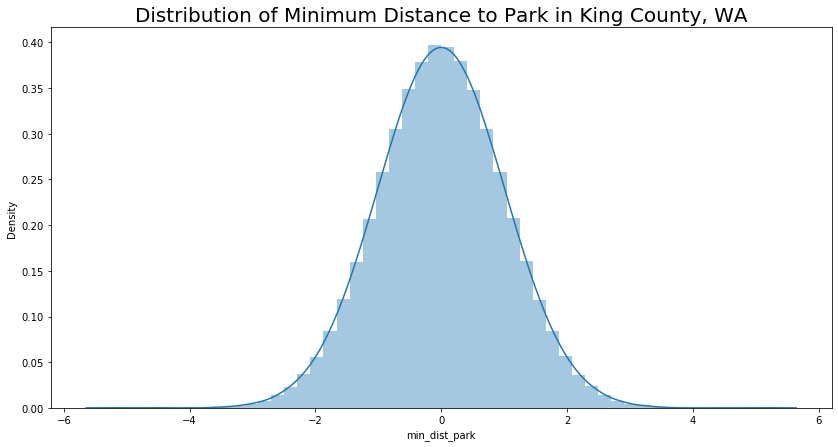

In [20]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['min_dist_park'])
plt.title("Distribution of Minimum Distance to Park in King County, WA", fontsize=20);
print("Skewness:", df_train['min_dist_park'].skew())
print("Kurtosis:", df_train['min_dist_park'].kurt())
print("n=",len(df_train['min_dist_park']))

Skewness: -0.005612832982306903
Kurtosis: 0.08826869203614374
n= 13689


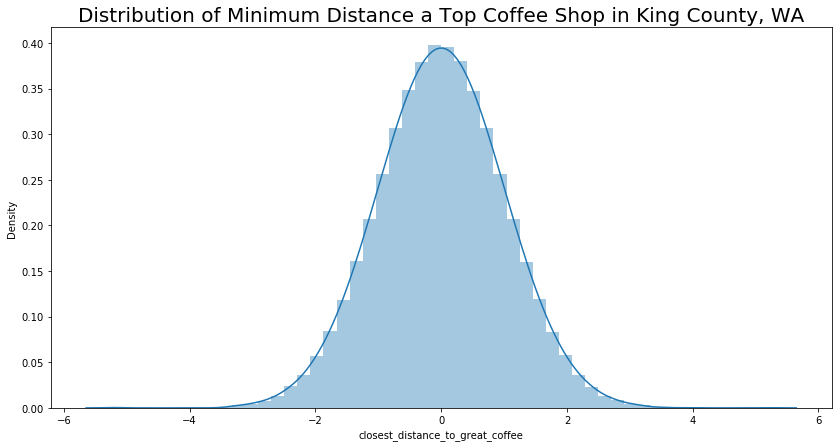

In [21]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['closest_distance_to_great_coffee'])
plt.title("Distribution of Minimum Distance a Top Coffee Shop in King County, WA", fontsize=20);
print("Skewness:", df_train['closest_distance_to_great_coffee'].skew())
print("Kurtosis:", df_train['closest_distance_to_great_coffee'].kurt())
print("n=",len(df_train['closest_distance_to_great_coffee']))

Skewness: -0.002577506220851784
Kurtosis: 0.062406015720917196
n= 13689


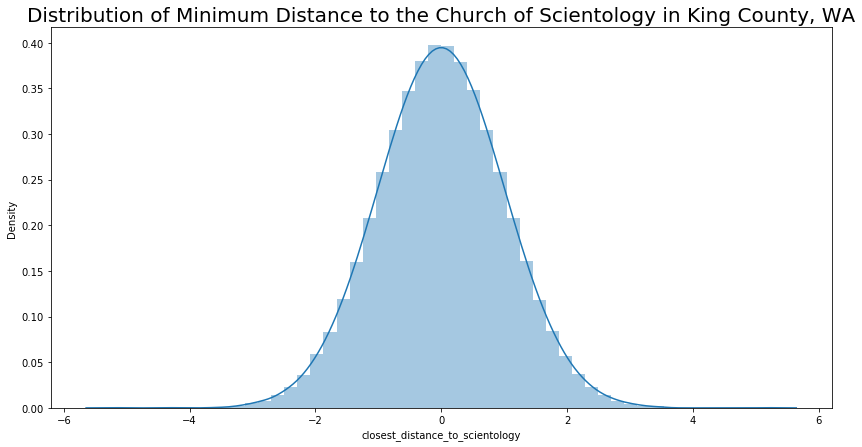

In [22]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['closest_distance_to_scientology'])
plt.title("Distribution of Minimum Distance to the Church of Scientology in King County, WA", fontsize=20);
print("Skewness:", df_train['closest_distance_to_scientology'].skew())
print("Kurtosis:", df_train['closest_distance_to_scientology'].kurt())
print("n=",len(df_train['closest_distance_to_scientology']))

Skewness: -0.026437770734410962
Kurtosis: 0.19957774228271008
n= 13689


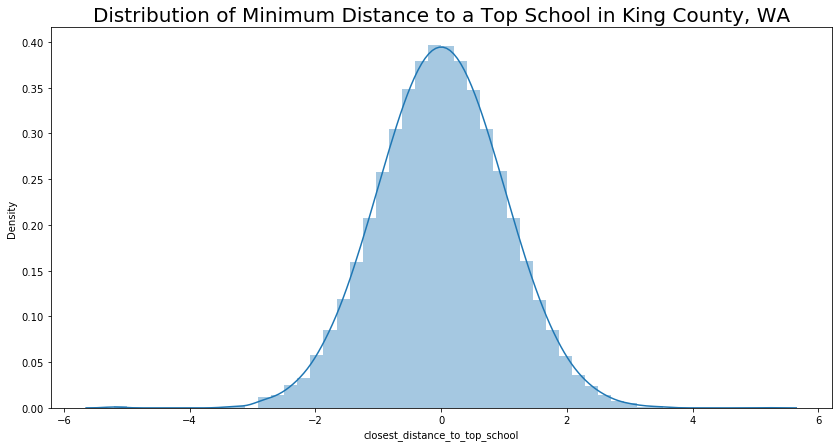

In [23]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['closest_distance_to_top_school'])
plt.title("Distribution of Minimum Distance to a Top School in King County, WA", fontsize=20);
print("Skewness:", df_train['closest_distance_to_top_school'].skew())
print("Kurtosis:", df_train['closest_distance_to_top_school'].kurt())
print("n=",len(df_train['closest_distance_to_top_school']))

> **Comment:** The quantile transformations greatly normalized the data!

## Removing unwanted columns

In [24]:
#Remove unwanted columns
drop_vars = ['price', 'sqft_living', 'lat', 'long', 'Unnamed: 0']
df_mvp = df_train.drop(columns=drop_vars)

In [25]:
df_mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13689 entries, 0 to 17494
Data columns (total 23 columns):
price_per_sqft                      13689 non-null float64
min_dist_park                       13689 non-null float64
closest_distance_to_top_school      13689 non-null float64
closest_distance_to_great_coffee    13689 non-null float64
closest_distance_to_scientology     13689 non-null float64
interaction                         13689 non-null float64
quant_sqft_living                   13689 non-null float64
quant_coffee                        13689 non-null float64
quant_parks                         13689 non-null float64
quant_schools                       13689 non-null float64
quant_scientology                   13689 non-null float64
quant_price                         13689 non-null float64
quant_price_per_sqft                13689 non-null float64
quant_interaction                   13689 non-null float64
grade_5                             13689 non-null int64
grade_6 

## Modeling the data

In [26]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [27]:
df_train.head()

,Unnamed: 0,price,sqft_living,lat,long,price_per_sqft,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,...,quant_interaction,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,221900.0,1180,47.5112,-122.257,188.050847,-0.594990,-1.643486,-0.995786,-0.248198,...,-1.113496,0,0,1,0,0,0,0,0,0
1,1,538000.0,2570,47.7210,-122.319,209.338521,0.616165,-0.501822,0.816275,-0.413054,...,-0.498561,0,0,1,0,0,0,0,0,0
3,3,604000.0,1960,47.5208,-122.393,308.163265,-0.379125,0.336802,0.747785,-0.349731,...,0.052283,0,0,1,0,0,0,0,0,0
4,4,510000.0,1680,47.6168,-122.045,303.571429,0.100048,0.096376,-0.159656,0.398895,...,0.156094,0,0,0,1,0,0,0,0,0
6,6,257500.0,1715,47.3097,-122.327,150.145773,0.244918,2.559186,1.252973,1.366169,...,1.816976,0,0,1,0,0,0,0,0,0


In [28]:
features = ['closest_distance_to_top_school', 'closest_distance_to_scientology',
            'closest_distance_to_great_coffee', 'min_dist_park']
target = ['price_per_sqft']
X = df_train[features]
y = df_train[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

linear_model = LinearRegression().fit(X_train, y_train)
linear_model_preds = linear_model.predict(X_test)

print('R^2: ', r2_score(y_test, linear_model_preds))

R^2:  0.40106226770818865


> **Comment:** This does not include grade.

In [29]:
features = ['closest_distance_to_top_school', 'closest_distance_to_scientology',
            'closest_distance_to_great_coffee', 'min_dist_park', 'grade_7', 'grade_8', 'grade_9']
target = ['price_per_sqft']
X = df_mvp[features]
y = df_mvp[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

linear_model = LinearRegression().fit(X_train, y_train)
linear_model_preds = linear_model.predict(X_test)

print('R^2: ', r2_score(y_test, linear_model_preds))

R^2:  0.40965391230669024


> **Comment:** This does not the interaction between closest distance to top school and church of scientology.

In [30]:
features = ['closest_distance_to_top_school', 'closest_distance_to_scientology',
            'closest_distance_to_great_coffee', 'min_dist_park', 'grade_7', 'grade_8', 'grade_9', 'quant_interaction']
target = ['price_per_sqft']
X = df_train[features]
y = df_train[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

linear_model = LinearRegression().fit(X_train, y_train)
linear_model_preds = linear_model.predict(X_test)

print('R^2: ', r2_score(y_test, linear_model_preds))

R^2:  0.4176818619942131


> **Comment:** Still not getting a healthy R^2 value.

In [32]:
features = ['closest_distance_to_top_school', 'closest_distance_to_scientology',
            'closest_distance_to_great_coffee', 'min_dist_park', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'quant_interaction']
target = ['price_per_sqft']
X = df_mvp[features]
y = df_mvp[target]

# running an iteration of the model using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

linear_model = LinearRegression().fit(X_train, y_train)
linear_model_preds = linear_model.predict(X_test)

print('R^2: ', r2_score(y_test, linear_model_preds))

R^2:  0.4176818619942131
